В этом ноутбуке мы:


*   Познакомимся с ансамблевыми алгоритмами для задач классификации и регрессии
*   Поработаем над задачами классификации c помощью классов BaggingClassifier, VotingClassifier.



# Ансамблевые методы

Сегодня мы будем классифицировать котиков и собачек. Надеемся, вы рады:)

### **[Задание 1]**

Для работы с уже использованным нами ранее датасетом для классификации котов и собак нам потребуется набор библиотек для работы с изображениями и код-обработчик файлов. Импортируйте нужные библиотеки, загрузите датасеты `train` и `test` в соответствующие папки и запустите код ниже.

In [ ]:
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

In [ ]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [ ]:
imagePaths = sorted(list(paths.list_images('/content/train')))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

Давайте закодируем признаки с помощью [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html):

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[1])

0


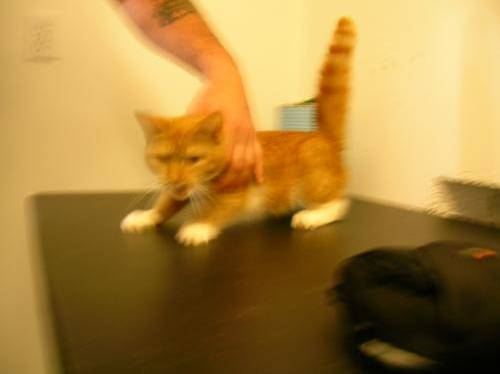

In [ ]:
Image(filename=imagePaths[0])

### **[Задание 2]**

Разделите выборку на `train`(75%) и `test`(25%), а `random_state` зафиксируйте в любом удобном вам значении;

In [ ]:
# Решение

## Bagging

**Bagging** - это метод ансамблирования в машинном обучении, который сочетает предсказания нескольких базовых моделей для получения более точных результатов. **Он основан на идее создания нескольких случайных подвыборок из обучающих данных и обучения каждой модели на этих подвыборках**. Конечные предсказания получаются путем усреднения предсказаний каждой модели.

Bagging широко используется как в задачах регрессии, так и в задачах классификации.

*   *В регрессии*, каждая базовая модель, например, дерево решений, обучается на разных подмножествах обучающих данных. Затем, для каждого нового примера, предсказание происходит путем усреднения предсказаний всех базовых моделей. Такой подход позволяет уменьшить дисперсию и повысить стабильность предсказания.
*   *В классификации*, каждая базовая модель обучается на случайных подвыборках обучающих данных. Затем, для каждого нового примера, каждая модель предсказывает класс, и окончательное предсказание определяется большинством голосов моделей. Таким образом, Bagging позволяет уменьшить разброс предсказаний и улучшить обобщающую способность модели.


В библиотеке `sklearn` применение модели `Bagging` осуществляется с помощью класса [`BaggingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html) для задач регрессии и класса [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#) для задач классификации. При инициализации, нужно указать базовую модель, которую будет использовать `Bagging`, а также число базовых моделей, называемое `n_estimators`. Затем можно задать другие параметры, такие как максимальная глубина дерева или число объектов для подвыборки. После инициализации, модель может быть обучена на обучающих данных и использована для предсказания новых примеров.

### **[Задание 3]**

Запустите код ниже, чтобы импортировать нужные модули

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

### **[Задание 4]**

Для разминки, мы передадим ансамблю только одну модель, чтобы вы могли понять, как это в точности работает. Не волнуйтесь, дальше мы будем использовать ансамбли в полную силу.


Иницииализируем модель для работы. Для разминки подойдет логистическая регрессия.

In [ ]:
# Решение

### **[Задание 5]**

Как вы могли заметить, мы импортировали `GridSearchCV`, чтобы сразу подбирать оптимальные параметры для логистической регрессии. Создайте словарь `params`, в котором опишите параметры, по которым `GridSearchCV` будет искать оптимальные значения.

В этом словаре обязательно должны быть перебраны значения:

*   `'C'` из списка [0.5,1,1.5];
*   `'class_weight'`из [None,'balanced'];
*   `'penalty'` из ['l1', 'l2', 'elasticnet'].

In [ ]:
# Решение

### **[Задание 6]**

Теперь инициализируйте `GridSearchCV` на параметрах `params` для нашей логистической регрессии `lgrg`.

Дополнительными параметрами передайте ей следующие значения: `cv=5, scoring='f1', n_jobs=-1`.

In [ ]:
# Решение

### **[Задание 7]**

Запустите обучение GridSearchCV и выведите значения лучших параметров

In [ ]:
# Решение

### **[Задание 8]**

Инициализируйте модель логистической регрессии с подобранными GridSearchCV параметрами. Обучать модель **не нужно**.

In [ ]:
# Решение

Теперь у нас есть модель логистической регресии, на которой мы и будем демонстрировать принципы работы беггинга.

Для того, чтобы запустить ансамбллевый метод беггинга для задачи классификации, ранее мы импортировали модуль [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier), для которого зафиксировали `random_state` и параметр `n_estimators`.

C другими параметрами модели можно ознакомиться в документации.

In [ ]:
bagging = BaggingClassifier(estimator=lgrg, n_estimators=10, random_state=0)
bagging.fit(feat_train, tar_train)

BaggingClassifier(estimator=LogisticRegression(C=0.5), random_state=0)

Выведем оценку для модели:

In [ ]:
bagging.score(feat_train, tar_train)

А теперь проверим, удалось ли модели справиться с задачей.

Возьмем изображение из обучающего датасета, получим для него гистограмму и для этих данных построим предсказание:

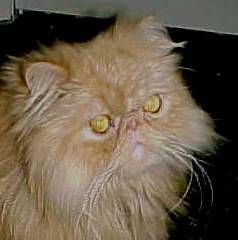

In [ ]:
Image(filename='test/cat.1017.jpg')

In [ ]:
singleImage = cv2.imread('test/cat.1017.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = bagging.predict(histt2)

In [ ]:
prediction

In [ ]:
bagging.predict_proba(histt2)

В этом кейсе с котиком модель отработала неверно, но в целом скор приемлемый.

Попробуем другие модели, вдруг получится что-то получше:)

## Voting

Voting (Голосование) — один из популярных ансамблевых методов в машинном обучении, который объединяет предсказания нескольких базовых моделей для достижения оптимального результата. Он широко используется как в задачах классификации, так и в задачах регрессии.



*   *В задачах классификации*, модель голосования совмещает прогнозы нескольких классификаторов для принятия окончательного решения. Существуют два основных подхода к голосованию: **мягкое голосование** и **жесткое голосование**. В мягком голосовании каждый классификатор вносит свой вклад в предсказание, выдавая вероятности принадлежности к классам, которые затем усредняются или взвешиваются. В жестком голосовании принимается решение на основе наиболее частого предсказания среди классификаторов.
*   *В задачах регрессии*, модель голосования объединяет предсказания регрессоров, обычно усредняя их. Результатом голосования является среднее или медианное значение предсказаний каждого регрессора. Это позволяет получить более точные и устойчивые прогнозы.


В библиотеке scikit-learn для использования модели голосования существует класс [`VotingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) для задач классификации и [`VotingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html) для задач регрессии. Эти классы позволяют создавать ансамбль из разных моделей, указанных в параметре `estimators`. Кроме того, можно задать веса каждому классификатору или регрессору с помощью параметра `weights`.

### **[Задание 9]**

Запустите код из ячейки ниже, чтобы подключить нужные библиотеки:

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB

Теперь нужно проинициализировать модели для VotingClassifier. Для примера, возьмем обученный нами ранее `BaggingClassifier`(он как раз требует улучшений) и новый для нас [`CalibratedClassifierCV`](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html#sklearn.calibration.CalibratedClassifierCV.predict_proba)(это новый метод, но для общего развития мы его используем). `CalibratedClassifierCV` требует для работы параметр `estimator`, в который мы передадим `GaussianNB`.

In [ ]:
base_clf = GaussianNB()
calibrated_clf = CalibratedClassifierCV(base_clf, cv=3)

### **[Задание 10]**

Мы подготовили список кортежей `base_estimators` с моделями для `VotingClassifier`.

Проинициализируем эту модель с параметрами следующими параметрами:
*   `estimators=base_estimators`,
*   `voting='soft'`

Саму модель сохраните в переменной `vclf`.

In [ ]:
# Решение
base_estimators = [('Bagging DT', bagging), ('RidgeClassifier', calibrated_clf)]

### **[Задание 11]**

Запустите обучение модели

In [ ]:
# Решение

### **[Задание 12]**

Получите оценку для модели

In [ ]:
# Решение

Теперь получим предсказание для нашего красивого котика:

In [ ]:
singleImage = cv2.imread('test/cat.1017.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = vclf.predict(histt2)

In [ ]:
vclf.predict_proba(histt2)

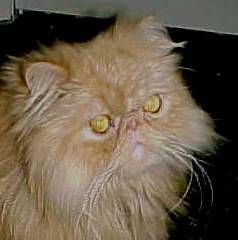

In [ ]:
Image(filename='test/cat.1017.jpg')

In [ ]:
prediction

Отлично, теперь наша модель справляется с котом, но скор низковат. Попробуем его улучшить и потестируем другой алгоритм.

### **[Задание 13] Опциональное**

Заметили, что мы не использовали `GridSearch`? И мы заметили:)

И предлагаем вам обучить для этой модели `GridSearchCV`. Подберите оптимальные параметры для `VotingClassifier` и входящих в него моделей. Обучите модели с этими параметрами и сравните результаты с дефолтной версией.

In [ ]:
# Решение


P.S. Мы просим вас воздержаться от предположения, что если в нашем занятии получилось, что `Voting` перформит лучше, чем `Bagging`, то априори эта модель лучше. Для каждой задачи — свой алгоритм. И именно поэтому мы даем новые модели и активно мотивируем вас искать информацию в документации: так вы сможете быстрее тестировать модели и выбирать лучшие.